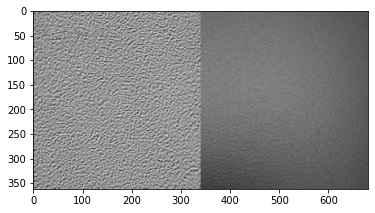

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage import io,img_as_ubyte
from skimage.filters import threshold_multiotsu,threshold_otsu
from skimage.filters.rank import entropy
from skimage.morphology import disk
path = r'/content/drive/MyDrive/Colab Notebooks/data/image9.jpg'
image = cv2.imread(path,0)
plt.imshow(image,cmap='gray')
plt.show()

***Variance***

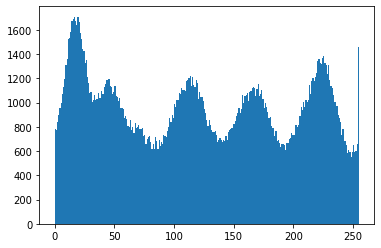

In [ ]:
k=7
img_mean = ndimage.uniform_filter(image, (k, k))
img_sqr_mean = ndimage.uniform_filter(image**2, (k, k))
img_var = img_sqr_mean - img_mean**2
plt.hist(img_var.flat, bins=255, range=(0,255))
plt.show()

***ENTROPY***

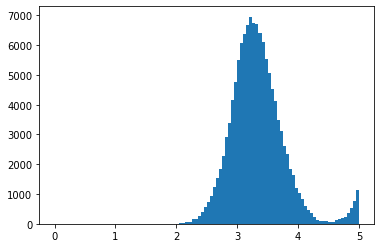

In [ ]:
entropy_img = entropy(image, disk(5))
plt.hist(entropy_img.flat, bins=100, range=(0,5))
plt.show()

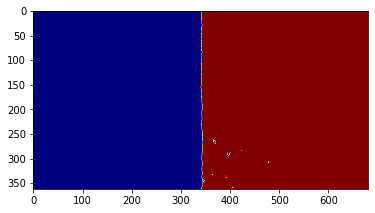

In [ ]:
thresh = threshold_otsu(entropy_img)
binary = entropy_img <= thresh
plt.imshow(binary,cmap='jet')
plt.show()

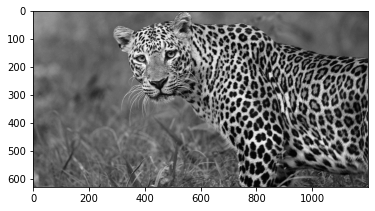

In [ ]:
path2 = r'/content/drive/MyDrive/Colab Notebooks/data/image5.jpg'
image2 = cv2.imread(path2,0)
plt.imshow(image2,cmap='gray')
plt.show()

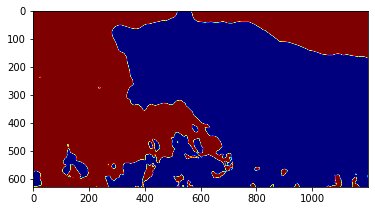

In [ ]:
entropy_img2 =  entropy(image2, disk(20))
thresh2 = threshold_otsu(entropy_img2)
binary2 = entropy_img2 < thresh2
plt.imshow(binary2,cmap='jet')
plt.show()

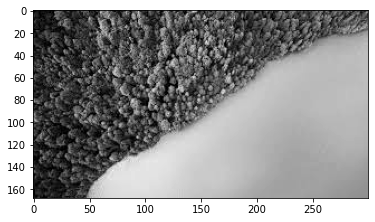

In [ ]:
path3 = r'/content/drive/MyDrive/Colab Notebooks/data/image12.jpg'
image3 = cv2.imread(path3,0)
plt.imshow(image3,cmap='gray')
plt.show()

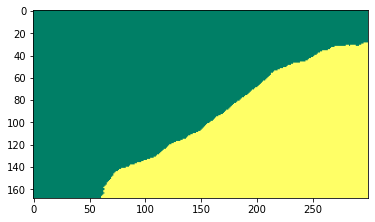

In [ ]:
thresh3 = threshold_otsu(entropy_img3)
binary3 = entropy_img3 < thresh3
plt.imshow(binary3,cmap='summer')
plt.show()

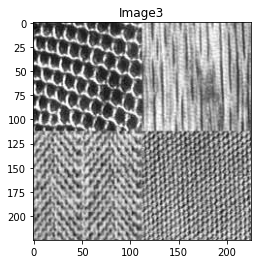

In [ ]:
path3 = r'/content/drive/MyDrive/Colab Notebooks/data/image15.jpg'
image3 = cv2.imread(path3,0)
plt.imshow(image3,cmap='gray')
plt.title('Image3')
plt.show()

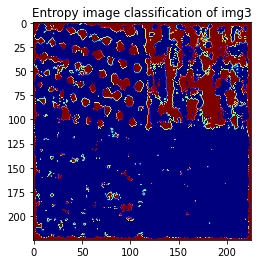

In [ ]:
entropy_img3 =  entropy(image3, disk(5))
thresh3 = threshold_otsu(entropy_img3)
binary3 = entropy_img3 < thresh3
plt.imshow(binary3,cmap='jet')
plt.title('Entropy image classification of img3')
plt.show()

***We see the result is not convincing at all,  This is because of more than two textures present in the image and hence no ta able to get a proper threshold***

***Hence a new method is proposed based on moments.***

**Step 1 : Finding the moments of image**

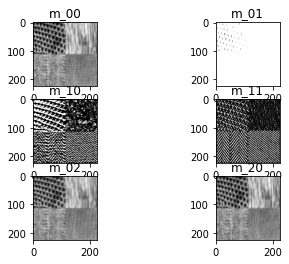

In [ ]:
inten_vector = image3.reshape(-1)
def vectorize(image,moment):
    m = cv2.filter2D(image, cv2.CV_8UC3, moment)
    mom = m.reshape(-1)
    return mom
### 5 x 5 image moments matrices

m_00 = np.ones([5,5])/25          
m_01 = np.array([(-2,1,0,1,2),(-2,1,0,1,2),(-2,1,0,1,2),(-2,1,0,1,2),(-2,1,0,1,2)])
m_10 = np.array([(-2,-2,-2,-2,-2),(-1,-1,-1,-1,-1),(0,0,0,0,0),(1,1,1,1,1),(2,2,2,2,2)])
m_11 = np.array([(2,1,0,-1,-2),(1,0,0,0,-1),(0,0,0,0,0),(-1,0,0,0,1),(-2,-1,0,1,2)])
m_20 = np.array([(2,2,2,2,2),(1,1,1,1,1),(0,0,0,0,0),(1,1,1,1,1),(2,2,2,2,2)])/30
m_02 = np.array([(2,1,0,1,2),(2,1,0,1,2),(2,1,0,1,2),(2,1,0,1,2),(2,1,0,1,2)])/30

### Vectorizing all pixels such that each pixel has a dimension of th moment
x_00 = vectorize(image3,m_00)
plt.subplot(321)
plt.title('m_00')
plt.imshow(x_00.reshape(image3.shape),cmap='gray')
x_01 = vectorize(image3,m_01)
plt.subplot(322)
plt.title('m_01')
plt.imshow(x_01.reshape(image3.shape),cmap='gray')
x_10 = vectorize(image3,m_10)
plt.subplot(323)
plt.title('m_10')
plt.imshow(x_10.reshape(image3.shape),cmap='gray')
x_11 = vectorize(image3,m_11)
plt.subplot(324)
plt.title('m_11')
plt.imshow(x_11.reshape(image3.shape),cmap='gray')
x_02 = vectorize(image3,m_02)
plt.subplot(325)
plt.title('m_02')
plt.imshow(x_02.reshape(image3.shape),cmap='gray')
x_20 = vectorize(image3,m_20)
plt.subplot(326)
plt.title('m_20')
plt.imshow(x_20.reshape(image3.shape),cmap='gray')
plt.show()

In [ ]:
### All pixels dimensionalised with the moments 

x = np.column_stack((inten_vector,x_00))
x = np.column_stack((x,x_00))
x = np.column_stack((x,x_00))
x = np.column_stack((x,x_00))
x = np.column_stack((x,x_00))
x = np.column_stack((x,x_00))
sig = (np.e**(x) - np.e**(-x))/(np.e**(x)+np.e**(-x))*255

**STEP 2: K-Means Clustering**

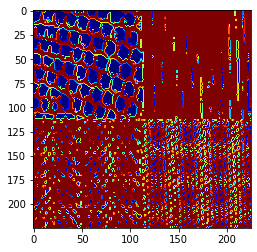

In [ ]:
 ############### K-Means
x_float = np.float32(sig)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 50, 0.85)
K = 4
ret,label,center=cv2.kmeans(x_float,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
labels = label.flatten()
center = center[:,0]            ### slicing only the intensity vectors
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((image3.shape))
plt.imshow(res2,cmap='jet')
plt.show()
# plt.plot(x_float[:,0])

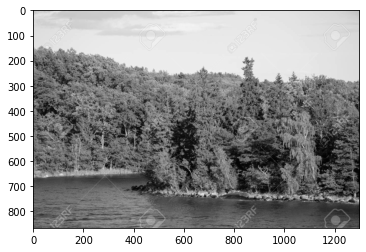

In [ ]:
path4 = r'/content/drive/MyDrive/Colab Notebooks/data/image19.jpg'
image4 = cv2.imread(path4,0)
plt.imshow(image4,cmap='gray')
plt.show()
inten_vector2 = image4.reshape(-1)
y_00 = vectorize(image4,m_00)
y_01 = vectorize(image4,m_01)
y_10 = vectorize(image4,m_10)
y_11 = vectorize(image4,m_11)
y_02 = vectorize(image4,m_02)
y_20 = vectorize(image4,m_20)
y = np.column_stack((inten_vector2,y_00))
y = np.column_stack((y,y_01))
y = np.column_stack((y,y_10))
y = np.column_stack((y,y_11))
y = np.column_stack((y,y_02))
y = np.column_stack((y,y_20))
sig2 = (np.e**(y) - np.e**(-y))/(np.e**(y)+np.e**(-y))*255

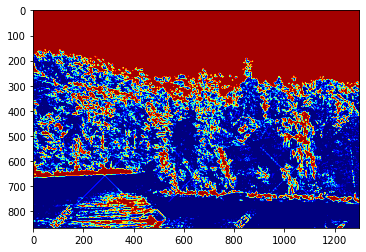

In [ ]:
x_float2 = np.float32(sig2)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 50, 0.85)
K = 3
ret2,label2,center2=cv2.kmeans(x_float2,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
labels2 = label2.flatten()
center2 = center2[:,0]            ### slicing only the intensity vectors
center2 = np.uint8(center2)
res = center2[labels2.flatten()]
res3 = res.reshape((image4.shape))
plt.imshow(res3,cmap='jet')
plt.show()